<a href="https://colab.research.google.com/github/andheartsjaz/Public/blob/master/Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifex = pd.read_sql_query('select * from lifeexpectancy',con=engine)

In [0]:
lifex.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


# ***Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.***

***Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.***

In [0]:
lifex.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [0]:
for column in lifex.columns:
    print(column)

Country
Year
Status
Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [0]:
lifex["Life expectancy "].isnull().values.sum()

10

In [0]:
lifex.isnull().values.sum()

2563

In [0]:
cleanlife = lifex.dropna()

In [0]:
cleanlife.isnull().values.any()

False

In [0]:
cleanlife.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649,1649.000000,1649,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Albania,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.840509,NaN,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,NaN,4.087711,NaN,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,NaN,2000.000000,NaN,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,NaN,2005.000000,NaN,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,NaN,2008.000000,NaN,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,NaN,2011.000000,NaN,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000


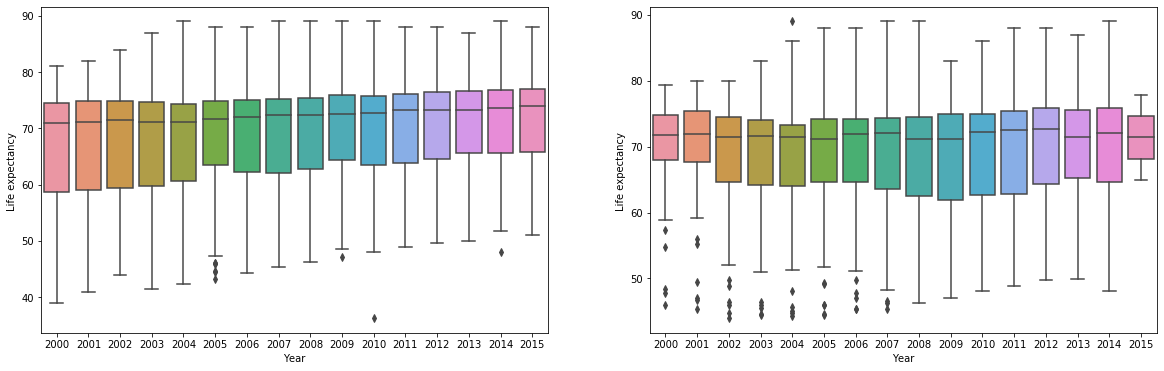

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(x="Year", y="Life expectancy ", data=lifex, ax=axs[0])
sns.boxplot(y="Life expectancy ", x="Year", data=cleanlife, ax=axs[1])

In [0]:
lifex.groupby("Life expectancy ").mean()[[" BMI ", "Measles ", "Polio"]]

,BMI,Measles,Polio
Life expectancy,,,
36.3,44.200000,0.000000,66.000000
39.0,17.200000,3575.000000,46.000000
41.0,17.500000,649.000000,38.000000
41.5,18.400000,586.000000,66.000000
42.3,18.800000,7.000000,69.000000
...,...,...,...
85.0,46.666667,221.916667,88.166667
86.0,48.113333,422.666667,95.333333
87.0,52.133333,246.000000,95.444444


In [0]:
lifex[["Life expectancy ", " BMI ", "Polio", "Alcohol",
       "percentage expenditure", "Hepatitis B", "Measles ", "Diphtheria ",
       " HIV/AIDS", "GDP", "Population", "Income composition of resources",
       "Schooling"]].corr()

,Life expectancy,BMI,Polio,Alcohol,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.567694,0.465556,0.404877,0.381864,0.256762,-0.157586,0.479495,-0.556556,0.461455,-0.021538,0.724776,0.751975
BMI,0.567694,1.000000,0.284569,0.330408,0.228700,0.150380,-0.175977,0.283147,-0.243717,0.301557,-0.072301,0.508774,0.546961
Polio,0.465556,0.284569,1.000000,0.221734,0.147259,0.486171,-0.136166,0.673553,-0.159560,0.211976,-0.038540,0.381078,0.417866
Alcohol,0.404877,0.330408,0.221734,1.000000,0.341285,0.087549,-0.051827,0.222020,-0.048845,0.354712,-0.035252,0.450040,0.547378
percentage expenditure,0.381864,0.228700,0.147259,0.341285,1.000000,0.016274,-0.056596,0.143624,-0.097857,0.899373,-0.025662,0.381952,0.389687
Hepatitis B,0.256762,0.150380,0.486171,0.087549,0.016274,1.000000,-0.120529,0.611495,-0.112675,0.083903,-0.123321,0.199549,0.231117
Measles,-0.157586,-0.175977,-0.136166,-0.051827,-0.056596,-0.120529,1.000000,-0.141882,0.030899,-0.076466,0.265966,-0.129568,-0.137225
Diphtheria,0.479495,0.283147,0.673553,0.222020,0.143624,0.611495,-0.141882,1.000000,-0.164860,0.200666,-0.028444,0.401456,0.425332
HIV/AIDS,-0.556556,-0.243717,-0.159560,-0.048845,-0.097857,-0.112675,0.030899,-0.164860,1.000000,-0.136491,-0.027854,-0.249519,-0.220429
GDP,0.461455,0.301557,0.211976,0.354712,0.899373,0.083903,-0.076466,0.200666,-0.136491,1.000000,-0.028270,0.460341,0.448273


with data that has not been cleaned, the strongest correlation is Schooling.

In [0]:
cleanlife[["Life expectancy ", " BMI ", "Polio", "Alcohol",
           "percentage expenditure", "Hepatitis B", "Measles ", "Diphtheria ",
           " HIV/AIDS", "GDP", "Population", "Income composition of resources",
           "Schooling"]].corr()

,Life expectancy,BMI,Polio,Alcohol,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.542042,0.327294,0.402718,0.409631,0.199935,-0.068881,0.341331,-0.592236,0.441322,-0.022305,0.721083,0.727630
BMI,0.542042,1.000000,0.186268,0.353396,0.242738,0.143302,-0.153245,0.176295,-0.210897,0.266114,-0.081416,0.510505,0.554844
Polio,0.327294,0.186268,1.000000,0.240315,0.128626,0.463331,-0.057850,0.609245,-0.107885,0.156809,-0.045387,0.314682,0.350147
Alcohol,0.402718,0.353396,0.240315,1.000000,0.417047,0.109889,-0.050110,0.242951,-0.027113,0.443433,-0.028880,0.561074,0.616975
percentage expenditure,0.409631,0.242738,0.128626,0.417047,1.000000,0.016760,-0.063071,0.134813,-0.095085,0.959299,-0.016792,0.402170,0.422088
Hepatitis B,0.199935,0.143302,0.463331,0.109889,0.016760,1.000000,-0.124800,0.588990,-0.094802,0.041850,-0.129723,0.184921,0.215182
Measles,-0.068881,-0.153245,-0.057850,-0.050110,-0.063071,-0.124800,1.000000,-0.058606,-0.003522,-0.064768,0.321946,-0.058277,-0.115660
Diphtheria,0.341331,0.176295,0.609245,0.242951,0.134813,0.588990,-0.058606,1.000000,-0.117601,0.158438,-0.039898,0.343262,0.350398
HIV/AIDS,-0.592236,-0.210897,-0.107885,-0.027113,-0.095085,-0.094802,-0.003522,-0.117601,1.000000,-0.108081,-0.027801,-0.248590,-0.211840
GDP,0.441322,0.266114,0.156809,0.443433,0.959299,0.041850,-0.064768,0.158438,-0.108081,1.000000,-0.020369,0.446856,0.467947


When dropping NAs, schooling still has the strongest correlation, but it is a little weaker.

In [0]:
headings = ["Life expectancy ", " BMI ", "Polio", "Alcohol",
           "percentage expenditure", "Hepatitis B", "Measles ", "Diphtheria ",
           " HIV/AIDS", "GDP", "Population", "Income composition of resources",
           "Schooling"]

In [0]:
lifex[headings].corr()

,Life expectancy,BMI,Polio,Alcohol,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.567694,0.465556,0.404877,0.381864,0.256762,-0.157586,0.479495,-0.556556,0.461455,-0.021538,0.724776,0.751975
BMI,0.567694,1.000000,0.284569,0.330408,0.228700,0.150380,-0.175977,0.283147,-0.243717,0.301557,-0.072301,0.508774,0.546961
Polio,0.465556,0.284569,1.000000,0.221734,0.147259,0.486171,-0.136166,0.673553,-0.159560,0.211976,-0.038540,0.381078,0.417866
Alcohol,0.404877,0.330408,0.221734,1.000000,0.341285,0.087549,-0.051827,0.222020,-0.048845,0.354712,-0.035252,0.450040,0.547378
percentage expenditure,0.381864,0.228700,0.147259,0.341285,1.000000,0.016274,-0.056596,0.143624,-0.097857,0.899373,-0.025662,0.381952,0.389687
Hepatitis B,0.256762,0.150380,0.486171,0.087549,0.016274,1.000000,-0.120529,0.611495,-0.112675,0.083903,-0.123321,0.199549,0.231117
Measles,-0.157586,-0.175977,-0.136166,-0.051827,-0.056596,-0.120529,1.000000,-0.141882,0.030899,-0.076466,0.265966,-0.129568,-0.137225
Diphtheria,0.479495,0.283147,0.673553,0.222020,0.143624,0.611495,-0.141882,1.000000,-0.164860,0.200666,-0.028444,0.401456,0.425332
HIV/AIDS,-0.556556,-0.243717,-0.159560,-0.048845,-0.097857,-0.112675,0.030899,-0.164860,1.000000,-0.136491,-0.027854,-0.249519,-0.220429
GDP,0.461455,0.301557,0.211976,0.354712,0.899373,0.083903,-0.076466,0.200666,-0.136491,1.000000,-0.028270,0.460341,0.448273


In [0]:
lifex2 = pd.read_sql_query('select * from lifeexpectancy',con=engine)

countries = lifex2["Country"].unique()

for country in countries:
    lifex2.loc[lifex2["Country"] == country, headings] = lifex2.loc[lifex2["Country"] == country, headings].interpolate()

lifex2.isnull().values.sum()
inter_life = lifex2.dropna()
inter_life[headings].corr()

,Life expectancy,BMI,Polio,Alcohol,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.601231,0.416848,0.393697,0.414037,0.249854,-0.138093,0.444374,-0.576291,0.443938,-0.010947,0.726843,0.745796
BMI,0.601231,1.000000,0.263145,0.378816,0.277709,0.198530,-0.168437,0.268357,-0.239976,0.300517,-0.071186,0.540653,0.585103
Polio,0.416848,0.263145,1.000000,0.238944,0.162390,0.451914,-0.113674,0.683476,-0.133022,0.188523,-0.026733,0.396182,0.437640
Alcohol,0.393697,0.378816,0.238944,1.000000,0.430628,0.106041,-0.029430,0.244481,-0.034379,0.457988,-0.025310,0.532677,0.589690
percentage expenditure,0.414037,0.277709,0.162390,0.430628,1.000000,-0.011692,-0.069380,0.168675,-0.109917,0.963171,-0.016512,0.408234,0.426584
Hepatitis B,0.249854,0.198530,0.451914,0.106041,-0.011692,1.000000,-0.142109,0.553605,-0.104198,0.008936,-0.092357,0.239410,0.268767
Measles,-0.138093,-0.168437,-0.113674,-0.029430,-0.069380,-0.142109,1.000000,-0.120356,0.019551,-0.073916,0.269875,-0.137647,-0.146832
Diphtheria,0.444374,0.268357,0.683476,0.244481,0.168675,0.553605,-0.120356,1.000000,-0.143653,0.190847,-0.021949,0.436979,0.458569
HIV/AIDS,-0.576291,-0.239976,-0.133022,-0.034379,-0.109917,-0.104198,0.019551,-0.143653,1.000000,-0.121529,-0.032229,-0.242593,-0.210570
GDP,0.443938,0.300517,0.188523,0.457988,0.963171,0.008936,-0.073916,0.190847,-0.121529,1.000000,-0.019666,0.450853,0.468154


In [0]:
win_life = winsorize(lifex[headings], (0, 0.05), inplace=True)
win_life = pd.DataFrame(win_life, columns=headings)
type(win_life)

pandas.core.frame.DataFrame

In [0]:
win_life[headings].corr()

,Life expectancy,BMI,Polio,Alcohol,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.567694,0.465556,0.404877,0.381864,0.256762,-0.157586,0.479495,-0.556556,0.461455,-0.021538,0.724776,0.751975
BMI,0.567694,1.000000,0.284569,0.330408,0.228700,0.150380,-0.175977,0.283147,-0.243717,0.301557,-0.072301,0.508774,0.546961
Polio,0.465556,0.284569,1.000000,0.221734,0.147259,0.486171,-0.136166,0.673553,-0.159560,0.211976,-0.038540,0.381078,0.417866
Alcohol,0.404877,0.330408,0.221734,1.000000,0.341285,0.087549,-0.051827,0.222020,-0.048845,0.354712,-0.035252,0.450040,0.547378
percentage expenditure,0.381864,0.228700,0.147259,0.341285,1.000000,0.016274,-0.056596,0.143624,-0.097857,0.899373,-0.025662,0.381952,0.389687
Hepatitis B,0.256762,0.150380,0.486171,0.087549,0.016274,1.000000,-0.120529,0.611495,-0.112675,0.083903,-0.123321,0.199549,0.231117
Measles,-0.157586,-0.175977,-0.136166,-0.051827,-0.056596,-0.120529,1.000000,-0.141882,0.030899,-0.076466,0.265966,-0.129568,-0.137225
Diphtheria,0.479495,0.283147,0.673553,0.222020,0.143624,0.611495,-0.141882,1.000000,-0.164860,0.200666,-0.028444,0.401456,0.425332
HIV/AIDS,-0.556556,-0.243717,-0.159560,-0.048845,-0.097857,-0.112675,0.030899,-0.164860,1.000000,-0.136491,-0.027854,-0.249519,-0.220429
GDP,0.461455,0.301557,0.211976,0.354712,0.899373,0.083903,-0.076466,0.200666,-0.136491,1.000000,-0.028270,0.460341,0.448273


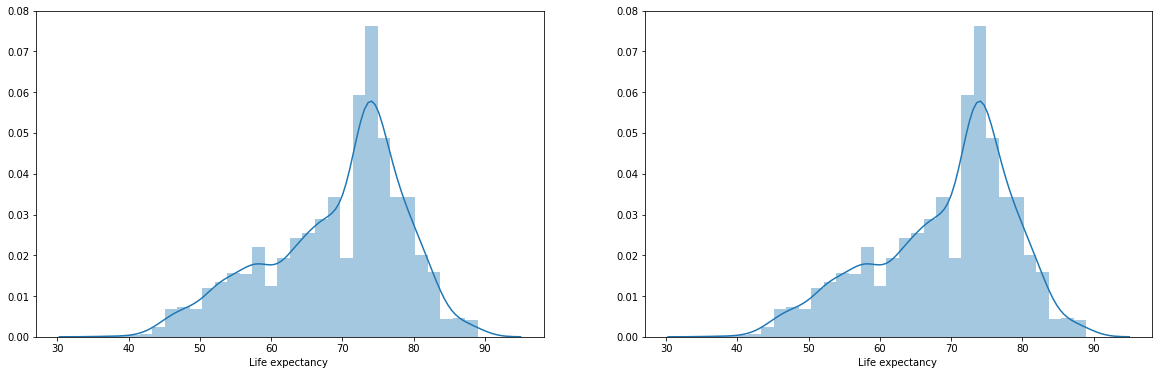

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.distplot(lifex['Life expectancy '].dropna(), ax=axs[0])
sns.distplot(win_life["Life expectancy "].dropna(), ax=axs[1])
# (lifex2['Life expectancy '] != win_life['Life expectancy ']).sum()

In [0]:
#lifex[headings] = lifex[headings].interpolate()

lifex_columns = ["Life expectancy ", " BMI ", "Polio", "Alcohol", 
                 "Adult Mortality", "infant deaths", "under-five deaths ",
                 " thinness  1-19 years", " thinness 5-9 years",
                 "percentage expenditure", "Hepatitis B", "Measles ",
                 "Diphtheria ", " HIV/AIDS", "GDP", "Population",
                 "Income composition of resources", "Schooling"]

In [0]:
lifex[lifex_columns].corr()

,Life expectancy,BMI,Polio,Alcohol,Adult Mortality,infant deaths,under-five deaths,thinness 1-19 years,thinness 5-9 years,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.567694,0.465556,0.404877,-0.696359,-0.196557,-0.222529,-0.477183,-0.471584,0.381864,0.256762,-0.157586,0.479495,-0.556556,0.461455,-0.021538,0.724776,0.751975
BMI,0.567694,1.000000,0.284569,0.330408,-0.387017,-0.227279,-0.237669,-0.532025,-0.538911,0.228700,0.150380,-0.175977,0.283147,-0.243717,0.301557,-0.072301,0.508774,0.546961
Polio,0.465556,0.284569,1.000000,0.221734,-0.274823,-0.170689,-0.188720,-0.221823,-0.222592,0.147259,0.486171,-0.136166,0.673553,-0.159560,0.211976,-0.038540,0.381078,0.417866
Alcohol,0.404877,0.330408,0.221734,1.000000,-0.195848,-0.115638,-0.112370,-0.428795,-0.417414,0.341285,0.087549,-0.051827,0.222020,-0.048845,0.354712,-0.035252,0.450040,0.547378
Adult Mortality,-0.696359,-0.387017,-0.274823,-0.195848,1.000000,0.078756,0.094146,0.302904,0.308457,-0.242860,-0.162476,0.031176,-0.275131,0.523821,-0.296049,-0.013647,-0.457626,-0.454612
infant deaths,-0.196557,-0.227279,-0.170689,-0.115638,0.078756,1.000000,0.996629,0.465711,0.471350,-0.085612,-0.223566,0.501128,-0.175171,0.025231,-0.108427,0.556801,-0.145139,-0.193720
under-five deaths,-0.222529,-0.237669,-0.188720,-0.112370,0.094146,0.996629,1.000000,0.467789,0.472263,-0.087852,-0.233126,0.507809,-0.195668,0.038062,-0.112081,0.544423,-0.163305,-0.209373
thinness 1-19 years,-0.477183,-0.532025,-0.221823,-0.428795,0.302904,0.465711,0.467789,1.000000,0.939102,-0.251369,-0.120429,0.224808,-0.229518,0.204064,-0.285697,0.253944,-0.422429,-0.471652
thinness 5-9 years,-0.471584,-0.538911,-0.222592,-0.417414,0.308457,0.471350,0.472263,0.939102,1.000000,-0.252905,-0.124960,0.221072,-0.222743,0.207283,-0.290539,0.251403,-0.411053,-0.460632
percentage expenditure,0.381864,0.228700,0.147259,0.341285,-0.242860,-0.085612,-0.087852,-0.251369,-0.252905,1.000000,0.016274,-0.056596,0.143624,-0.097857,0.899373,-0.025662,0.381952,0.389687


In [0]:
cleanlife[lifex_columns].corr()

,Life expectancy,BMI,Polio,Alcohol,Adult Mortality,infant deaths,under-five deaths,thinness 1-19 years,thinness 5-9 years,percentage expenditure,Hepatitis B,Measles,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
Life expectancy,1.000000,0.542042,0.327294,0.402718,-0.702523,-0.169074,-0.192265,-0.457838,-0.457508,0.409631,0.199935,-0.068881,0.341331,-0.592236,0.441322,-0.022305,0.721083,0.727630
BMI,0.542042,1.000000,0.186268,0.353396,-0.351542,-0.234425,-0.242137,-0.547018,-0.554094,0.242738,0.143302,-0.153245,0.176295,-0.210897,0.266114,-0.081416,0.510505,0.554844
Polio,0.327294,0.186268,1.000000,0.240315,-0.199853,-0.156929,-0.171164,-0.164070,-0.174489,0.128626,0.463331,-0.057850,0.609245,-0.107885,0.156809,-0.045387,0.314682,0.350147
Alcohol,0.402718,0.353396,0.240315,1.000000,-0.175535,-0.106217,-0.101082,-0.403755,-0.386208,0.417047,0.109889,-0.050110,0.242951,-0.027113,0.443433,-0.028880,0.561074,0.616975
Adult Mortality,-0.702523,-0.351542,-0.199853,-0.175535,1.000000,0.042450,0.060365,0.272230,0.286723,-0.237610,-0.105225,-0.003967,-0.191429,0.550691,-0.255035,-0.015012,-0.442203,-0.421171
infant deaths,-0.169074,-0.234425,-0.156929,-0.106217,0.042450,1.000000,0.996906,0.463415,0.461908,-0.090765,-0.231769,0.532680,-0.161871,0.007712,-0.098092,0.671758,-0.134754,-0.214372
under-five deaths,-0.192265,-0.242137,-0.171164,-0.101082,0.060365,0.996906,1.000000,0.464785,0.462289,-0.092158,-0.240766,0.517506,-0.178448,0.019476,-0.100331,0.658680,-0.148097,-0.226013
thinness 1-19 years,-0.457838,-0.547018,-0.164070,-0.403755,0.272230,0.463415,0.464785,1.000000,0.927913,-0.255035,-0.129406,0.180642,-0.187242,0.172592,-0.277498,0.282529,-0.453679,-0.491199
thinness 5-9 years,-0.457508,-0.554094,-0.174489,-0.386208,0.286723,0.461908,0.462289,0.927913,1.000000,-0.255635,-0.133251,0.174946,-0.180952,0.183147,-0.277959,0.277913,-0.438484,-0.472482
percentage expenditure,0.409631,0.242738,0.128626,0.417047,-0.237610,-0.090765,-0.092158,-0.255035,-0.255635,1.000000,0.016760,-0.063071,0.134813,-0.095085,0.959299,-0.016792,0.402170,0.422088


***ANSWER:*** There were a few thousand missing values. After attempting to winsorize and an interpolation, interpolation seemed to give the best fit without losing so much data. Simply dropping NAs created more outliers than were originally present, specifically in the early years of the data. In all models, though, schooling shows the strongest level of correlation.

***Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.***

Text(0.5, 1.0, 'Winsor')

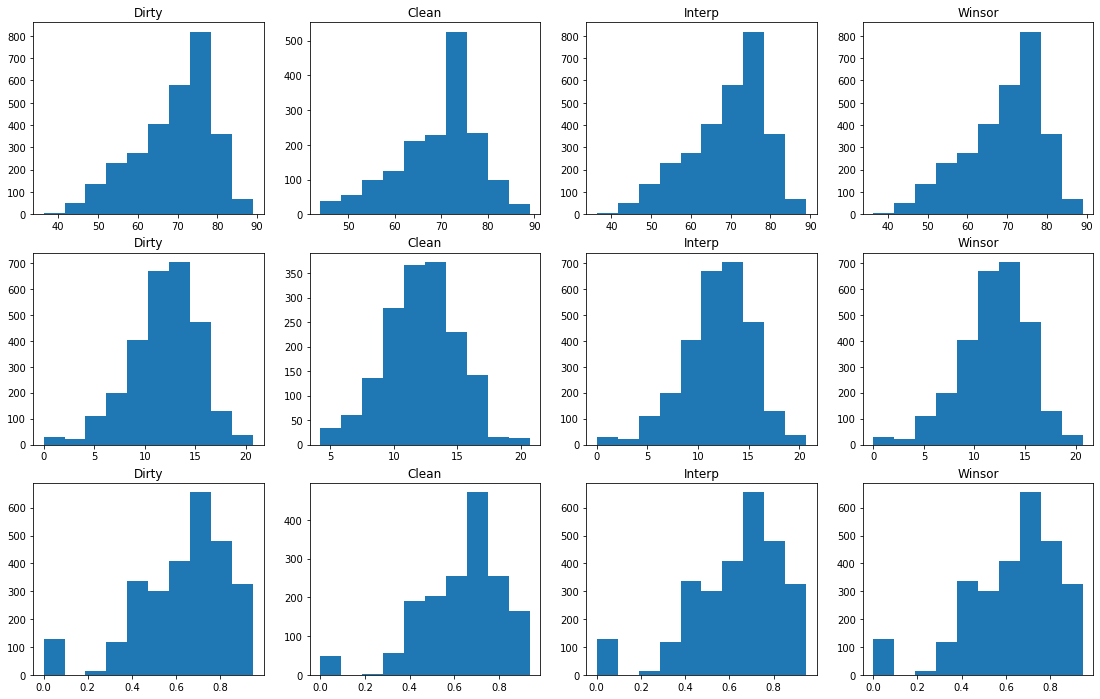

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

plt.figure(figsize=(19,12))

plt.subplot(3, 4, 1)
plt.hist(lifex["Life expectancy "])
plt.title("Dirty")

plt.subplot(3, 4, 2)
plt.hist(cleanlife["Life expectancy "])
plt.title("Clean")

plt.subplot(3, 4, 3)
plt.hist(lifex2["Life expectancy "])
plt.title("Interp")

plt.subplot(3, 4, 4)
plt.hist(win_life["Life expectancy "])
plt.title("Winsor")

plt.subplot(3, 4, 5)
plt.hist(lifex["Schooling"])
plt.title("Dirty")

plt.subplot(3, 4, 6)
plt.hist(cleanlife["Schooling"])
plt.title("Clean")

plt.subplot(3, 4, 7)
plt.hist(lifex2["Schooling"])
plt.title("Interp")

plt.subplot(3, 4, 8)
plt.hist(win_life["Schooling"])
plt.title("Winsor")

plt.subplot(3, 4, 9)
plt.hist(lifex["Income composition of resources"])
plt.title("Dirty")

plt.subplot(3, 4, 10)
plt.hist(cleanlife["Income composition of resources"])
plt.title("Clean")

plt.subplot(3, 4, 11)
plt.hist(lifex2["Income composition of resources"])
plt.title("Interp")

plt.subplot(3, 4, 12)
plt.hist(win_life["Income composition of resources"])
plt.title("Winsor")

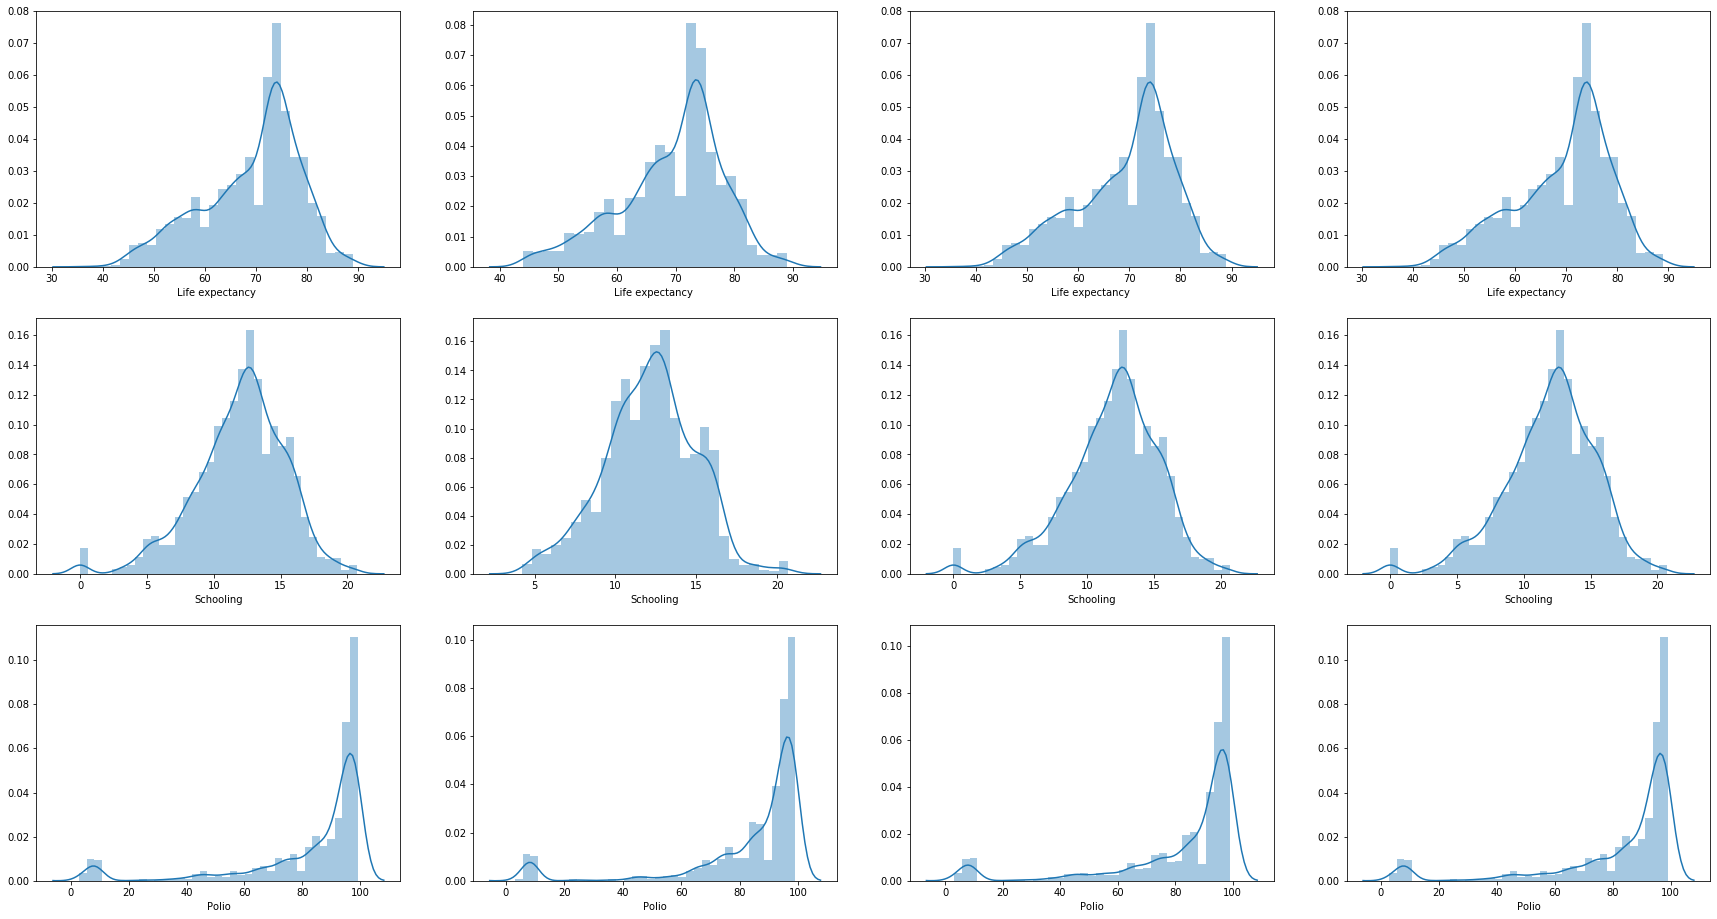

In [0]:
fig, axs = plt.subplots(3, 4, figsize=(30, 16))
sns.distplot(lifex["Life expectancy "].dropna(), ax=axs[0][0])
sns.distplot(cleanlife["Life expectancy "].dropna(), ax=axs[0][1])
sns.distplot(lifex2["Life expectancy "].dropna(), ax=axs[0][2])
sns.distplot(win_life["Life expectancy "].dropna(), ax=axs[0][3])
sns.distplot(lifex["Schooling"].dropna(), ax=axs[1][0])
sns.distplot(cleanlife["Schooling"].dropna(), ax=axs[1][1])
sns.distplot(lifex2["Schooling"].dropna(), ax=axs[1][2])
sns.distplot(win_life["Schooling"].dropna(), ax=axs[1][3])
sns.distplot(lifex["Polio"].dropna(), ax=axs[2][0])
sns.distplot(cleanlife["Polio"].dropna(), ax=axs[2][1])
sns.distplot(lifex2["Polio"].dropna(), ax=axs[2][2])
sns.distplot(win_life["Polio"].dropna(), ax=axs[2][3])

In [0]:
jb_stats = jarque_bera(lifex["Life expectancy "].dropna())
norm_stats = normaltest(lifex["Life expectancy "].dropna())

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(cleanlife["Life expectancy "].dropna())
norm_stats = normaltest(cleanlife["Life expectancy "].dropna())

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(lifex2["Life expectancy "].dropna())
norm_stats = normaltest(lifex2["Life expectancy "].dropna())

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(win_life["Life expectancy "].dropna())
norm_stats = normaltest(win_life["Life expectancy "].dropna())

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 205.61247743959427 and p value is 0.0
Normality test statistics is 177.35500491008625 and p value is 3.075034656878767e-39
Jarque-Bera test statistics is 108.54592902688941 and p value is 0.0
Normality test statistics is 93.1464769584523 and p value is 5.9360769772633565e-21
Jarque-Bera test statistics is 205.61247743959427 and p value is 0.0
Normality test statistics is 177.35500491008625 and p value is 3.075034656878767e-39
Jarque-Bera test statistics is 205.61247743959427 and p value is 0.0
Normality test statistics is 177.35500491008625 and p value is 3.075034656878767e-39


In [0]:
cleanlife["Income composition of resources"].unique()

array([0.479, 0.476, 0.47 , 0.463, 0.454, 0.448, 0.434, 0.433, 0.415,
       0.405, 0.396, 0.381, 0.373, 0.341, 0.34 , 0.338, 0.762, 0.761,
       0.759, 0.752, 0.738, 0.725, 0.721, 0.713, 0.703, 0.696, 0.685,
       0.681, 0.674, 0.67 , 0.662, 0.656, 0.741, 0.737, 0.732, 0.724,
       0.714, 0.705, 0.697, 0.69 , 0.686, 0.68 , 0.673, 0.527, 0.523,
       0.508, 0.495, 0.488, 0.48 , 0.468, 0.825, 0.823, 0.822, 0.816,
       0.802, 0.794, 0.792, 0.788, 0.782, 0.78 , 0.775, 0.77 , 0.776,
       0.739, 0.736, 0.729, 0.72 , 0.707, 0.692, 0.679, 0.668, 0.657,
       0.645, 0.644, 0.639, 0.936, 0.933, 0.93 , 0.927, 0.925, 0.921,
       0.918, 0.915, 0.91 , 0.908, 0.905, 0.902, 0.899, 0.892, 0.887,
       0.884, 0.88 , 0.872, 0.87 , 0.864, 0.86 , 0.854, 0.848, 0.841,
       0.837, 0.847, 0.833, 0.745, 0.742, 0.728, 0.719, 0.708, 0.682,
       0.675, 0.659, 0.651, 0.57 , 0.565, 0.557, 0.545, 0.535, 0.52 ,
       0.513, 0.506, 0.499, 0.491, 0.484, 0.796, 0.793, 0.787, 0.771,
       0.755, 0.723,

In [0]:
from scipy.stats import boxcox

# cleansed = cleanlife.dropna()
# lifex_boxcox,_ = boxcox(cleansed["Life expectancy "])
# school_boxcox,_ = boxcox(cleansed["Schooling"])
# income_boxcox,_ = boxcox(cleansed["Income composition of resources"])

# plt.figure(figsize=(18,5))

# # histograms of the box-cox transformed data
# plt.subplot(1, 3, 1)
# plt.hist(lifex_boxcox)
# plt.title("histogram of subscribers (box-cox transformed)")

# plt.subplot(1, 3, 2)
# plt.hist(school_boxcox)
# plt.title("histogram of video uploads (box-cox transformed)")

# plt.subplot(1, 3, 3)
# plt.hist(income_boxcox)
# plt.title("histogram of video views (box-cox transformed)")

# plt.show()

I am unable to run this boxcox because it after Slack hours. Commented out while I continue analysis. The JB and Normality tests show the distributions are not normal, so a boxcox would be helpful. All data appears to be positive, despite what the error says.

***In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.***

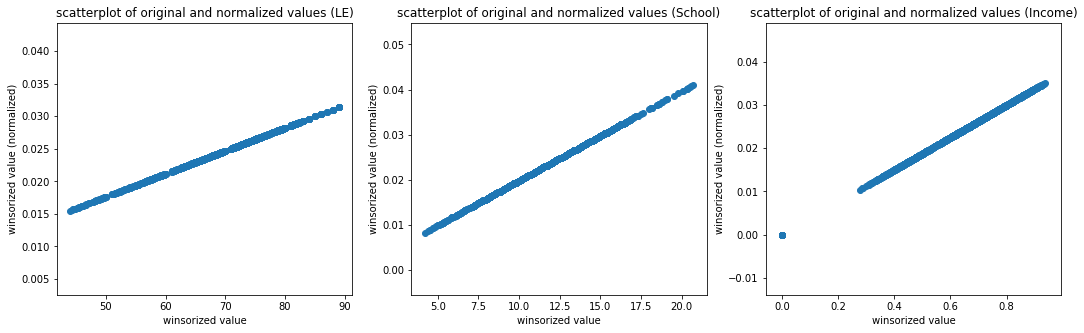

In [0]:
from sklearn.preprocessing import normalize
win_life = win_life.dropna()
# normalize the winsorized variables
win_life["norm_life_expectancy"] = normalize(np.array(win_life["Life expectancy "]).reshape(1,-1)).reshape(-1,1)
win_life["norm_schooling"] = normalize(np.array(win_life["Schooling"]).reshape(1,-1)).reshape(-1,1)
win_life["norm_income_composition"] = normalize(np.array(win_life["Income composition of resources"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
# draw the scatter plot using seaborn.
plt.scatter(win_life["Life expectancy "], win_life["norm_life_expectancy"])
plt.title("scatterplot of original and normalized values (LE)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(1,3,2)
# draw the scatter plot using seaborn.
plt.scatter(win_life["Schooling"], win_life["norm_schooling"])
plt.title("scatterplot of original and normalized values (School)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(1,3,3)
# draw the scatter plot using seaborn.
plt.scatter(win_life["Income composition of resources"], win_life["norm_income_composition"])
plt.title("scatterplot of original and normalized values (Income)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.show()

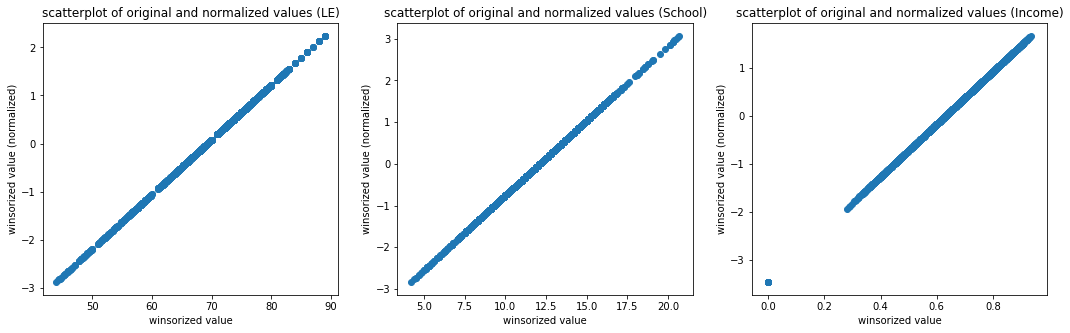

In [0]:
from sklearn.preprocessing import scale

win_life["scaled_life_expectancy"] = scale(win_life["Life expectancy "])
win_life["scaled_schooling"] = scale(win_life["Schooling"])
win_life["scaled_income_composition"] = scale(win_life["Income composition of resources"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
# draw the scatter plot using seaborn.
plt.scatter(win_life["Life expectancy "], win_life["scaled_life_expectancy"])
plt.title("scatterplot of original and normalized values (LE)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(1,3,2)
# draw the scatter plot using seaborn.
plt.scatter(win_life["Schooling"], win_life["scaled_schooling"])
plt.title("scatterplot of original and normalized values (School)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(1,3,3)
# draw the scatter plot using seaborn.
plt.scatter(win_life["Income composition of resources"], win_life["scaled_income_composition"])
plt.title("scatterplot of original and normalized values (Income)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.show()

Since the Income composition of resources still did not come out right, we will drop it.

That said, notice how the similar are the lines once they have been corrected for outliers, missing values, and scaled. This is all necessary to in order to adequately make an "educated guess" at what the issue is: in this case, it is education. At first I figured it would be something linked to a disease. But the numbers simply did not support that idea. What the numbers said I should look at is the column called Schooling, which is education in each country.

Once I began digging in there, building the models, the data got closer and closer and until we landed here. Two very similar lines showing off their positive correlation. So if we want to extend lives, particularly in emerging economies, we need to help them establish centers of education. After all, a person with Polio who doesn't know how they got Polio in the first place cannot help the next person avoid Polio, be that through education or vaccination.